In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import the data
#clean the data
#visualize some points with graphics
#create dummies for categorical stuff



In [52]:
df = pd.read_csv('train_copia.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#identifying null values that can alterate de algorith performance
plt.figure(figsize=(14,7))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [55]:
#deletando todas as colunas que nao farao diferenca na analise
df.drop(['PassengerId','Name','Ticket'],axis =1,inplace=True)

In [57]:
#pegando os valores das medianas de idade por classe
df.drop(['Cabin'],axis =1,inplace=True)
df.groupby('Pclass')['Age'].median()





Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [45]:
df.head()
#criando a funcao para imputar os valores
def fill_age(columns):
  Pclass = columns[1]
  Age = columns[0]
  if pd.isnull(Age):
    if Pclass ==1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age


In [48]:
#substituindo os valores nulos de idade com imputacao
df['Age'] = df[['Age','Pclass']].apply(lambda x: fill_age,axis=1)
df['Age']

0      <function fill_age at 0x7ec9d470cdc0>
1      <function fill_age at 0x7ec9d470cdc0>
2      <function fill_age at 0x7ec9d470cdc0>
3      <function fill_age at 0x7ec9d470cdc0>
4      <function fill_age at 0x7ec9d470cdc0>
                       ...                  
886    <function fill_age at 0x7ec9d470cdc0>
887    <function fill_age at 0x7ec9d470cdc0>
888    <function fill_age at 0x7ec9d470cdc0>
889    <function fill_age at 0x7ec9d470cdc0>
890    <function fill_age at 0x7ec9d470cdc0>
Name: Age, Length: 891, dtype: object

<Axes: >

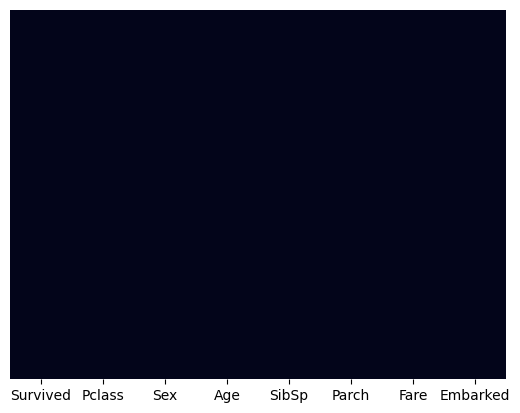

In [37]:
#chamando o heatmap novamente
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [28]:
#convertendo todas as colunas categoricas em 0-1
sex = pd.get_dummies(df['Sex'])
embark = pd.get_dummies(df['Embarked'])

